In [32]:
import cv2
import random
import matplotlib.pyplot as plt
from pathlib import Path

from IPython import display

In [26]:
def get_random_video():
    fake_video_path = Path.cwd().parent / "datasets/DeepfakeTIMIT/higher_quality"
    orig_video_path = Path.cwd().parent / "datasets/VidTIMIT/"
    orig_video_files = list(orig_video_path.rglob("*.avi"))

    idx = random.randint(0, len(orig_video_files))
    orig_video = orig_video_files[idx]
    print(orig_video.parent.stem)
    fake_video_files = list(Path(fake_video_path / orig_video.parent.stem).rglob("*.avi"))

    for fake_video in fake_video_files:
        if fake_video.name.startswith(orig_video.stem):
            break

    return fake_video, orig_video

mdbb0


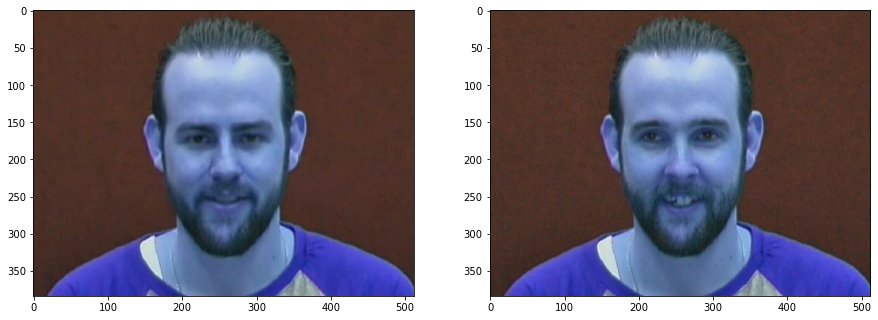

In [17]:
fake_video, orig_video = get_random_video()
cap = cv2.VideoCapture(str(fake_video))

while(cap.isOpened()):
    ret, fake_frame = cap.read()
    break
    
cap = cv2.VideoCapture(str(orig_video))
while(cap.isOpened()):
    ret, orig_frame = cap.read()
    break

fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,10)
ax[0].imshow(fake_frame)
ax[1].imshow(orig_frame)
plt.show()

In [18]:
def show_hist(img):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

In [19]:
def img_diff(img1, img2):
    return img1 - img2

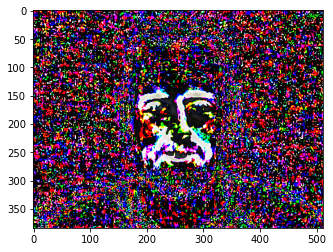

In [20]:
plt.imshow(img_diff(orig_frame, fake_frame))
plt.show()

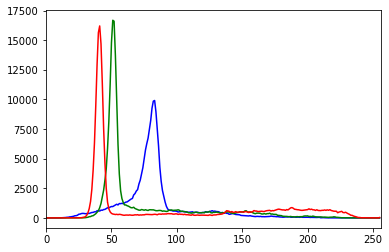

In [21]:
show_hist(orig_frame)

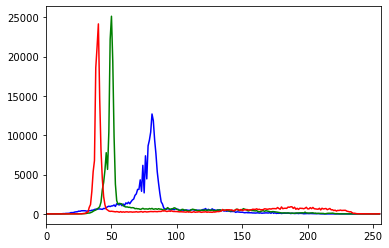

In [22]:
show_hist(fake_frame)

In [23]:
from cv2 import CascadeClassifier
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')

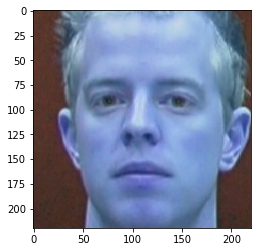

In [35]:
_, video = get_random_video()
cap = cv2.VideoCapture(str(video))

while(cap.isOpened()):
    ret, img = cap.read()
    if not ret:
        break
    bboxes = classifier.detectMultiScale(img)
    for bb in bboxes:
        x1, y1, w, h = bb
        face = img[y1:y1+h, x1:x1+w, :]
        plt.imshow(face)
        plt.show()
        display.clear_output(wait=True)
        